 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
# YOUR CODE HERE
whalereturnsdf = pd.read_csv(whale_returns_csv,index_col = 'Date', infer_datetime_format = True, parse_dates = True)
whalereturnsdf.sort_index()
whalereturnsdf.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Count nulls

# YOUR CODE HERE
whalereturnsdf.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whalereturnsdf = whalereturnsdf.dropna()
whalereturnsdf.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
# YOUR CODE HERE
algoreturnsdf = pd.read_csv(algo_returns_csv, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
algoreturnsdf.sort_index()
algoreturnsdf.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [6]:
# Count nulls
# YOUR CODE HERE
algoreturnsdf.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algoreturnsdf = algoreturnsdf.dropna()
algoreturnsdf.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
# YOUR CODE HERE
sp500df = pd.read_csv('sp500_history.csv', index_col='Date', infer_datetime_format=True,
                            parse_dates=True)
sp500df = sp500df.sort_index()
sp500df.head()

Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93

In [9]:
# Check Data Types
# YOUR CODE HERE
sp500df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE

# getting rid of dollar sign and casting values as floats
sp500df['Close']=sp500df['Close'].str.replace('$','')
sp500df['Close']=sp500df['Close'].astype(float)
sp500df.head()
sp500df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500df = sp500df.pct_change()

sp500df.head()




Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [12]:
# Drop nulls
# YOUR CODE HERE
sp500df = sp500df.dropna()
sp500df.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [13]:
# Rename Column
# YOUR CODE HERE
sp500df=sp500df.rename(columns={'Close':"SP500"})
sp500df.head()

SP500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

allportfolios = pd.concat([whalereturnsdf,algoreturnsdf,sp500df],axis='columns',join='inner')
allportfolios.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2     SP500  
Date                            
2019-04-16  0.002899  0.000509  
2019-04-17 -0.005228 -0.002274  
2019-04-18 -0.001229  0.001579  
2019-04-22 -0.001936  0.001012  
2019-04-23  0.009622  0.008841

In [15]:
allportfolios.sort_index()
allportfolios.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2     SP500  
Date                            
2019-04-16  0.002899  0.000509  
2019-04-17 -0.005228 -0.002274  
2019-04-18 -0.001229  0.001579  
2019-04-22 -0.001936  0.001012  
2019-04-23  0.009622  0.008841

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

### Does any portfolio outperform the S&P500?
* Based on the cumulative returns, berkshire hathaway outperforms the SP500. However, both portfolios dipped to the same level of returns in the beginning of 2019
* Algo 1 also consistently outperforms the SP500 - unlike most of the other portfolios, Algo 1 did not dip in the beginning of 2019
* Tiger global management outperformed the SP500 until early 2018, and it has not outperformed the market since then

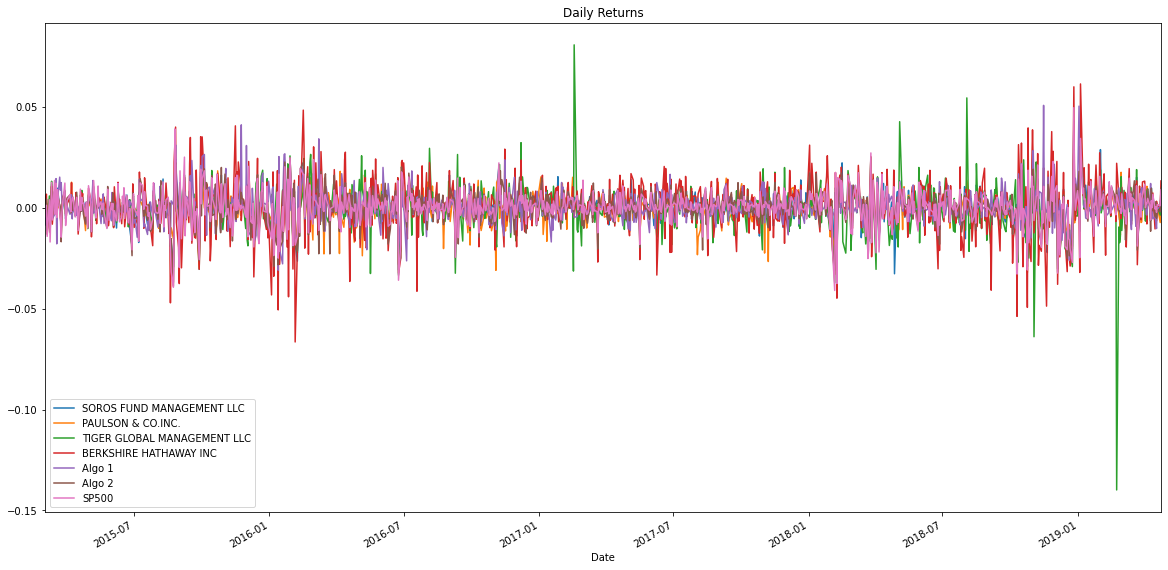

In [16]:
# Plot daily returns
# YOUR CODE HERE
allportfolios.plot(figsize=(20,10),title='Daily Returns',xlim=["2015-03-03", "2019-04-23"])


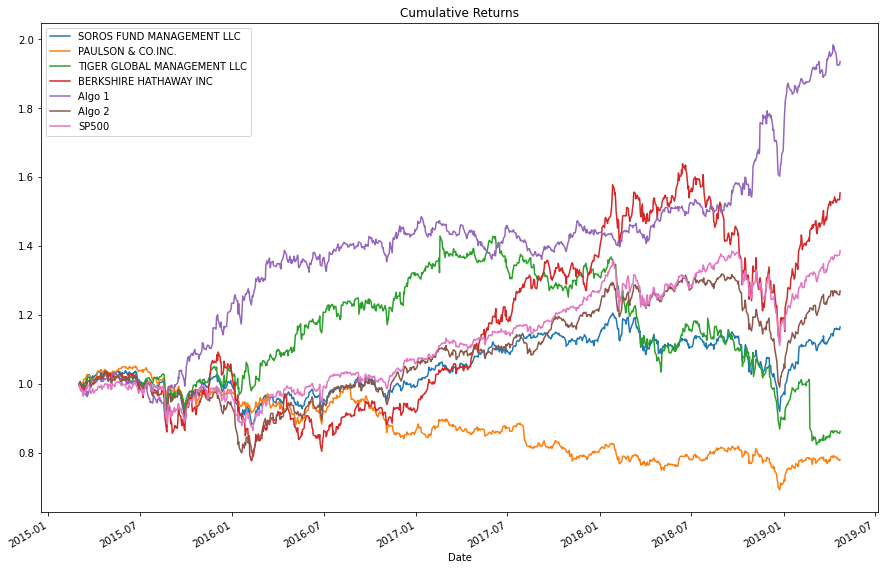

In [17]:
# Plot cumulative returns
# YOUR CODE HERE
cum_returns = (1+allportfolios).cumprod()
cum_returns.plot(figsize=(15,10),title='Cumulative Returns')



## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

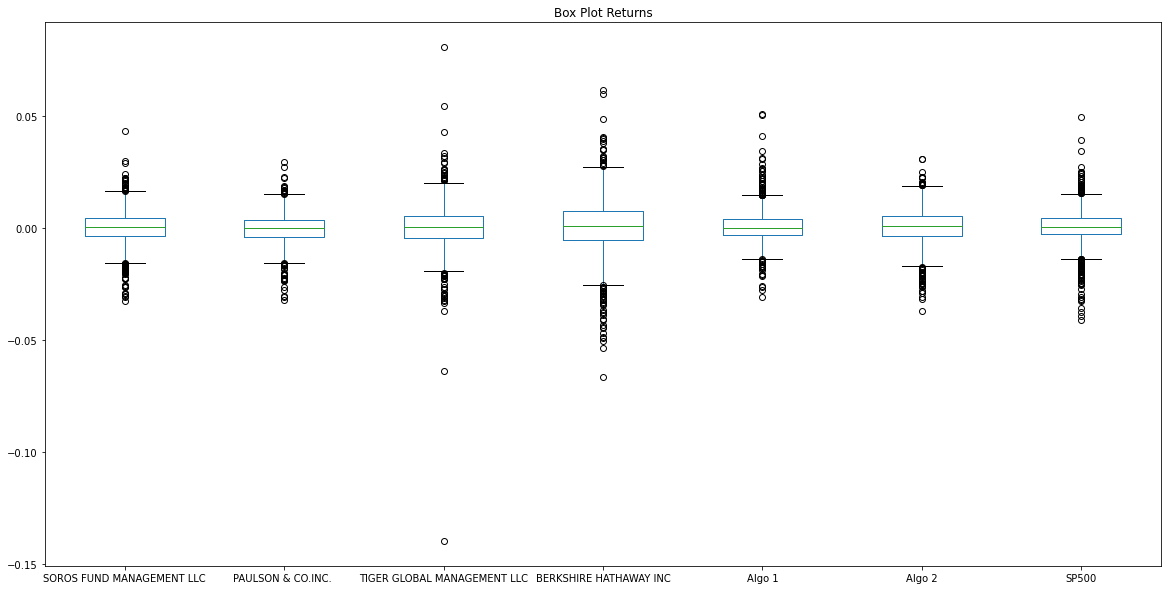

In [18]:
# Box plot to visually show risk
# YOUR CODE HERE

allportfolios.plot.box(figsize=(20,10),title='Box Plot Returns')

# Berkshire slightly riskier than SP500 with potential for higher rewards/losses
# Algo 1: less risky with higher rewards?

### largest and smallest spreads
* largest (most risky): berskhire, tiger, algo 1
* smallest (least risky): SP500, Algo1, Paulson

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

allportfolios.std().sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
sp500risk = allportfolios['SP500'].std()
allportfolios.std() > sp500risk


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Which portfolios are riskier than the SP500 based on the standard deviations?
* Berkshire Hathaway and Tire Global Managment (can also see in the box plot)

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

annualstd = allportfolios.std() * np.sqrt(252)
annualstd

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

### Does the risk increase for each portfolio at the same time risk increases in the SP500?
* Generally, yes.  Additionally, Tiger GLobal Managment has had increased gains in a time period where the rest of the portfolios including the market did not

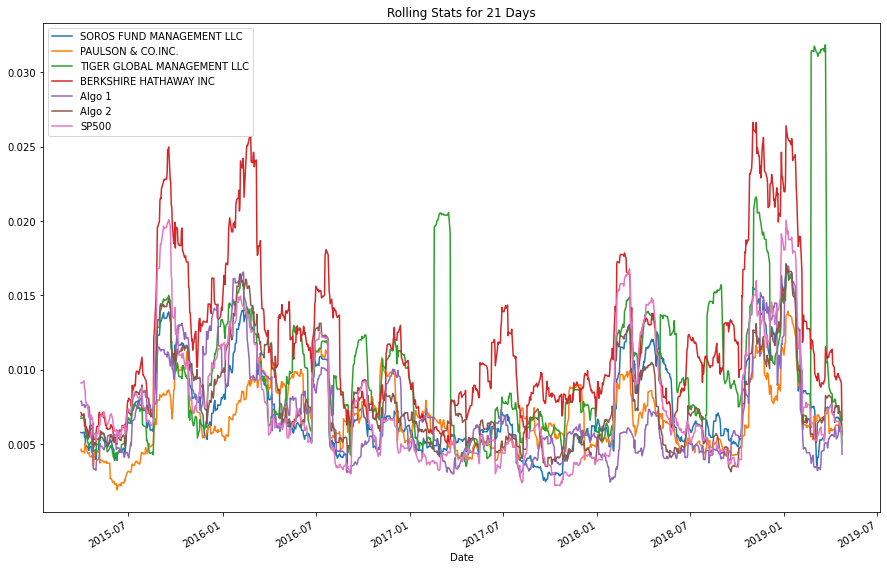

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

allportfolios_rollingstd = allportfolios.rolling(window=21).std()
allportfolios_rollingstd.plot(figsize=(15,10),title='Rolling Stats for 21 Days')

In [23]:
# Construct a correlation table
# YOUR CODE HERE
corrdf = allportfolios.corr()
corrdf.style.background_gradient(cmap='autumn')

### Which returns most closely mimic the returns of the SP500?
* Algo 2, Soros Fund Management, and Berkshire Hathaway

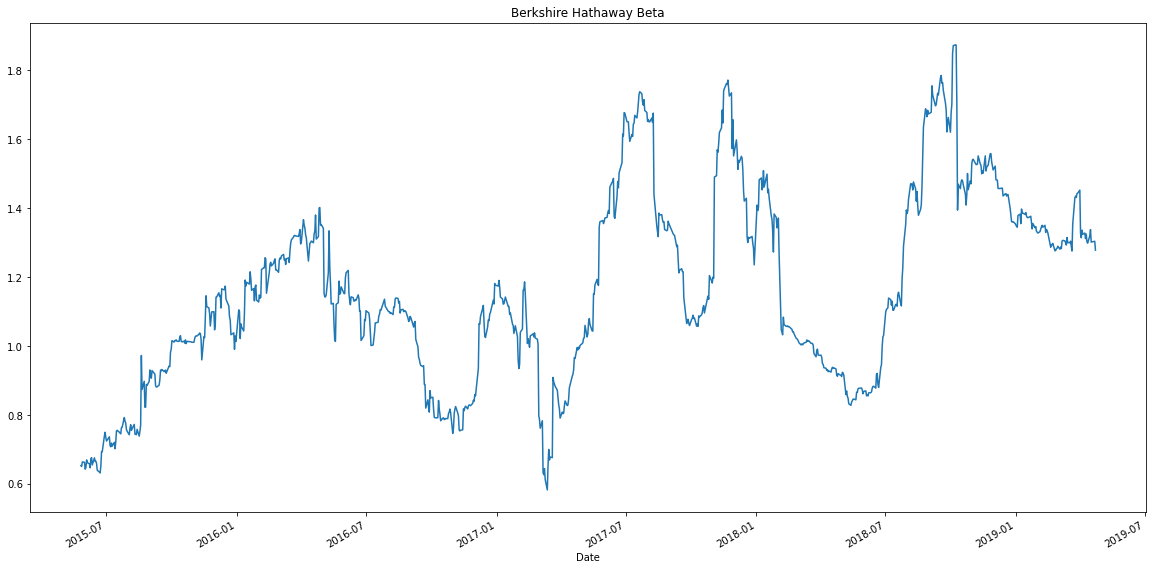

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

covariance = allportfolios['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(allportfolios['SP500'])
variance = allportfolios['SP500'].rolling(window=60).var()
beta = covariance / variance

beta.plot(figsize=(20,10),title="Berkshire Hathaway Beta")

### Does the portfolio seem sensitive to movements in the S&P 500?

* as of recently, based on its beta, Berkshire Hathaway has experienced higher returns than the market. In the graph above, it's maintained a Beta larger than 1 since late 2017 except for one 6 month period in 2018 where its beta fell below 1 suggesting lower returns than the market
* prior to late 2017, however, the berkshire portfolio was experiencing less returns than the market, maintaining a beta of below 1 for a large part of Jul 2015 through late 2017.

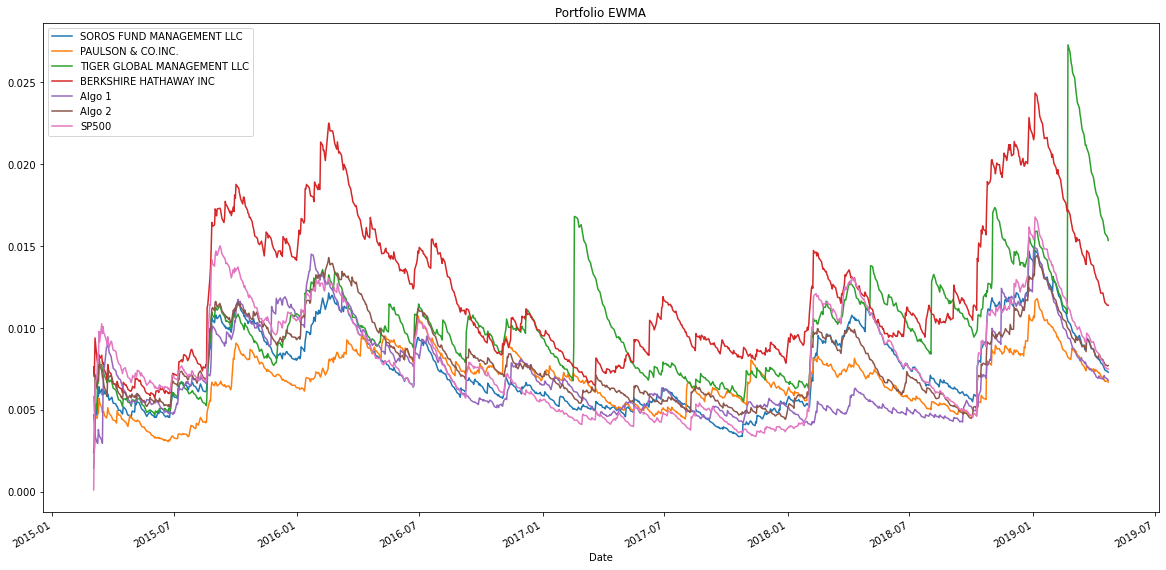

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

allportfolios.ewm(halflife=21).std().plot(figsize=(20,10),title='Portfolio EWMA')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharperatios = (allportfolios.mean() * 252) / (allportfolios.std() * np.sqrt(252))
sharperatios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

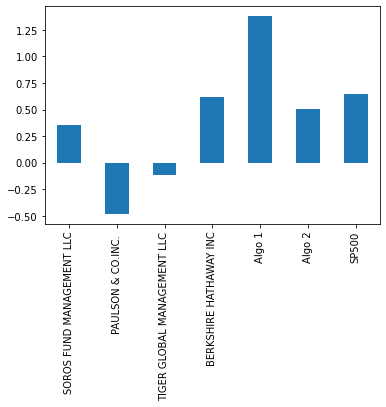

In [27]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharperatios.plot(kind='bar')

### On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 

* Algo 1 does outperform the market and the whales using the sharpe ratios as a performance metric. Algo 2 does not outperform the market. It does, however, outperform 3/4 of the whales.**

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
# YOUR CODE HERE

appledf = pd.read_csv('aapl_historical.csv',index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
appledf.sort_index()

Symbol    NOCP
Trade DATE               
2018-05-11   AAPL  188.59
2018-05-14   AAPL  188.15
2018-05-15   AAPL  186.44
2018-05-16   AAPL  188.18
2018-05-17   AAPL  186.99
...           ...     ...
2019-05-03   AAPL  211.75
2019-05-06   AAPL  208.48
2019-05-07   AAPL  202.86
2019-05-08   AAPL  202.90
2019-05-09   AAPL  200.72

[250 rows x 2 columns]

In [29]:
# Read the second stock
# YOUR CODE HERE
googledf = pd.read_csv('goog_historical.csv',index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
googledf.sort_index()

Symbol     NOCP
Trade DATE                
2018-05-11   GOOG  1098.26
2018-05-14   GOOG  1100.20
2018-05-15   GOOG  1079.23
2018-05-16   GOOG  1081.77
2018-05-17   GOOG  1078.59
...           ...      ...
2019-05-03   GOOG  1185.40
2019-05-06   GOOG  1189.39
2019-05-07   GOOG  1174.10
2019-05-08   GOOG  1166.27
2019-05-09   GOOG  1162.38

[250 rows x 2 columns]

In [30]:
# Read the third stock
# YOUR CODE HERE
costdf = pd.read_csv('cost_historical.csv',index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
costdf.sort_index()

Symbol    NOCP
Trade DATE               
2018-05-11   COST  195.76
2018-05-14   COST  195.88
2018-05-15   COST  195.48
2018-05-16   COST  198.71
2018-05-17   COST  199.60
...           ...     ...
2019-05-03   COST  244.62
2019-05-06   COST  244.23
2019-05-07   COST  240.18
2019-05-08   COST  241.34
2019-05-09   COST  243.47

[250 rows x 2 columns]

In [31]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

allstocks = pd.concat([googledf,appledf,costdf],axis='rows',join='inner')
allstocks

Symbol     NOCP
Trade DATE                
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40
...           ...      ...
2018-05-17   COST   199.60
2018-05-16   COST   198.71
2018-05-15   COST   195.48
2018-05-14   COST   195.88
2018-05-11   COST   195.76

[750 rows x 2 columns]

In [32]:
# Reset the index
# YOUR CODE HERE

allstocks=allstocks.reset_index()
allstocks.head()


Trade DATE Symbol     NOCP
0 2019-05-09   GOOG  1162.38
1 2019-05-08   GOOG  1166.27
2 2019-05-07   GOOG  1174.10
3 2019-05-06   GOOG  1189.39
4 2019-05-03   GOOG  1185.40

In [33]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
stockspivot = pd.pivot_table(allstocks, values=['NOCP'],index=['Trade DATE'],columns=['Symbol'],aggfunc=np.sum)
stockspivot.head()

NOCP                 
Symbol        AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59

In [34]:
# Drop Nulls & calc daily returns
# YOUR CODE HERE



stockspivot = stockspivot.pct_change()

stockspivot=stockspivot.dropna()
stockspivot.head()


NOCP                    
Symbol          AAPL      COST      GOOG
Trade DATE                              
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
2018-05-18 -0.003637 -0.003206 -0.011339

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
stocksreturns = stockspivot.dot(weights)
stocksreturns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
finalportfolio = pd.concat([allportfolios,stocksreturns],axis='columns',join='inner')
finalportfolio=finalportfolio.rename(columns={0:"Custom"})

finalportfolio.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2     SP500    Custom  
2019-04-16  0.002899  0.000509  0.000340  
2019-04-17 -0.005228 -0.002274  0.009292  
2019-04-18 -0.001229  0.001579  0.001545  
2019-04-22 -0.001936  0.001012  0.001217  
2019-04-23  0.009622  0.008841  0.011959

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

finalportfolio=finalportfolio.dropna()
finalportfolio.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   
2018-05-18                  -0.004357           -0.002672   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   
2018-05-18                    -0.012832               -0.002212  0.002557   

              Algo 2     SP500    Custom  
2018-05-14  0.001635  0.000884  0.000015  
2018-05-15 -0.001139 -0.006842 -0.010064  
2018-05-16  0.003341  0.004061  0.009403  
2018-05-17  0.005205 -0.000856 -0.001595  
2018-05-18 -0.002496 -0.002632 -0.006061

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

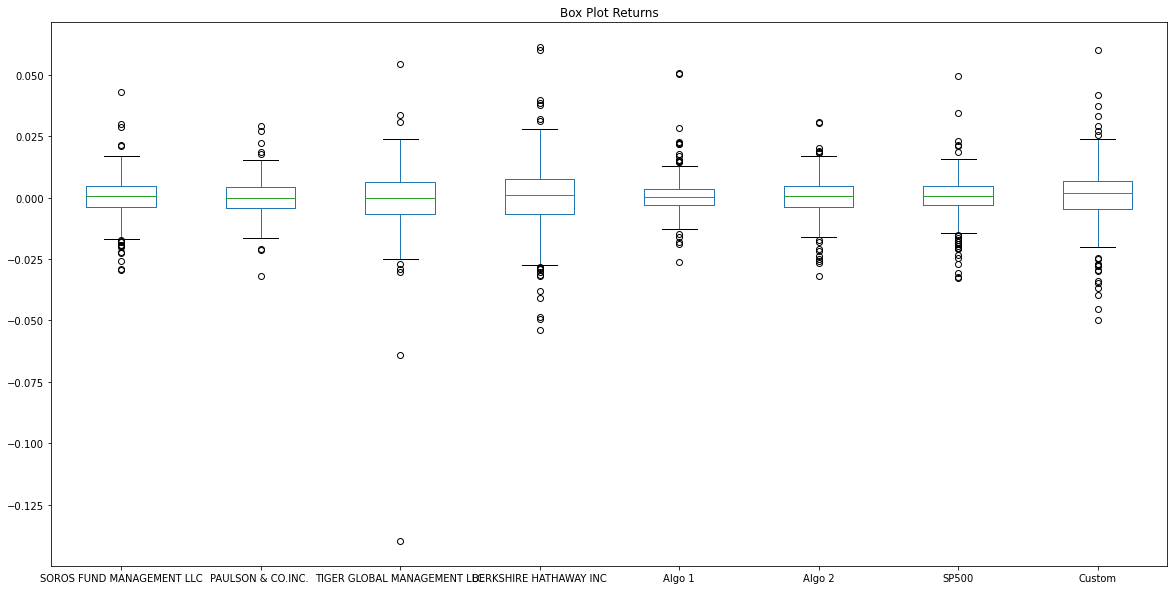

In [38]:
# Risk
# YOUR CODE HERE

# Box Plot
finalportfolio.plot.box(figsize=(20,10),title='Box Plot Returns')



### Based on the Box Plot, which portfolios are more risky than Custom?
* Berkshire & Tiger appear to be riskier than Custom. Custom however is riskier than the market

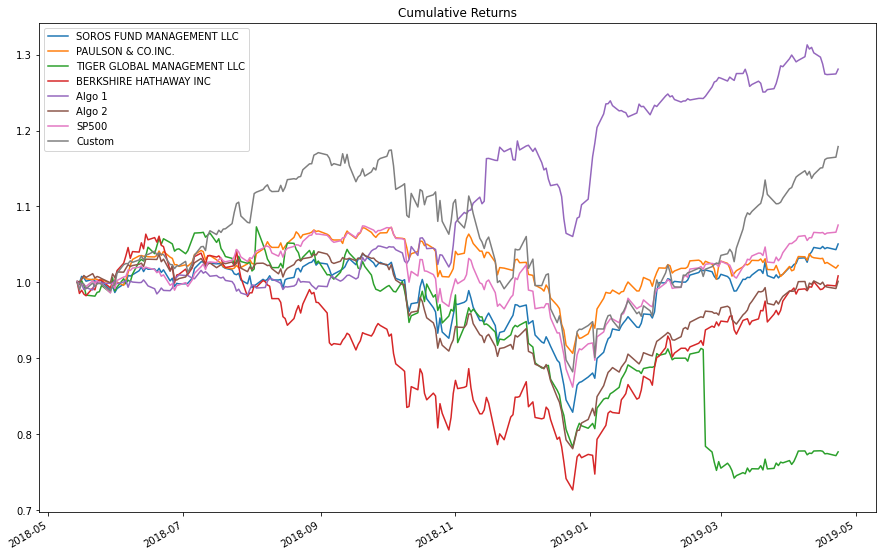

In [39]:
# cumulative returns
cum_returns_final = (1+finalportfolio).cumprod()
cum_returns_final.plot(figsize=(15,10),title='Cumulative Returns')



### Based on Cumulative Returns, how does Custom fare against the market?

* Custom typically outperforms the market, but is generally very closely tied to the overall trend of the market

In [40]:
#RIsk: Standard deviation
finalportfolio.std().sort_values()

PAULSON & CO.INC.              0.007353
Algo 1                         0.008423
Algo 2                         0.008791
SOROS FUND MANAGEMENT LLC      0.009240
SP500                          0.009578
Custom                         0.013323
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
dtype: float64

In [41]:
# based on standard deviation, which portfolios are less risky than custom
customrisk = finalportfolio['Custom'].std()
finalportfolio.std() < customrisk



SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                          True
Algo 2                          True
SP500                           True
Custom                         False
dtype: bool

### Based on standard deviation, which portfolios are less risky than custom?
* less risky portfolios include: SOROS FUND MANAGEMENT LLC, PAULSON & CO INC,ALGO 1, ALGO 2, SP500

In [42]:
# annualized standard deviation (252 days)

annaulstd_final = finalportfolio.std() * np.sqrt(252)
annaulstd_final.sort_values()

PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
SP500                          0.152054
Custom                         0.211496
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
dtype: float64

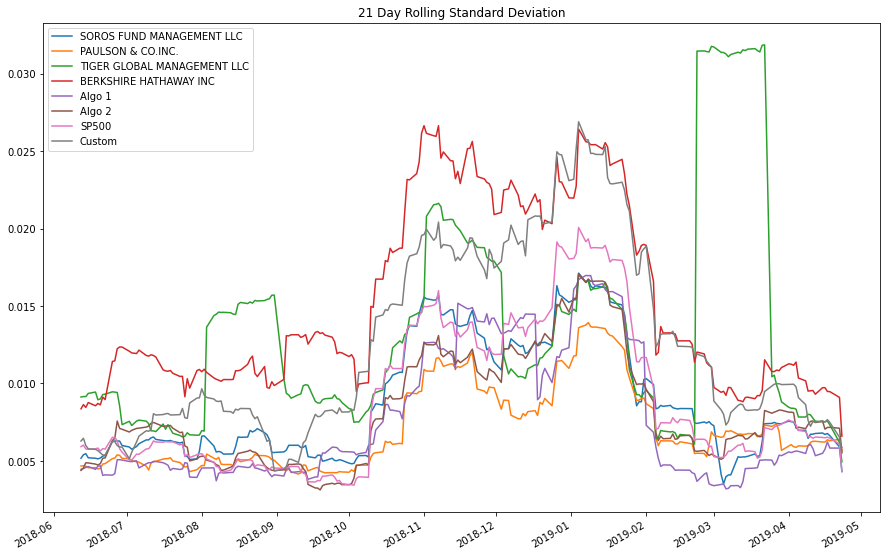

In [43]:
# Rolling
# YOUR CODE HERE

# 21 day rolling standard deviation
finalportfolio_rollingstd = finalportfolio.rolling(window=21).std()
finalportfolio_rollingstd.plot(figsize=(15,10),title='21 Day Rolling Standard Deviation')

* Custom typically goes up when the market goes up, but it tends to have higher returns and either similar or better losses than the market.

In [44]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

sharperatios_final = (finalportfolio.mean() * 252) / (finalportfolio.std() * np.sqrt(252))
sharperatios_final

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
Custom                         0.933123
dtype: float64

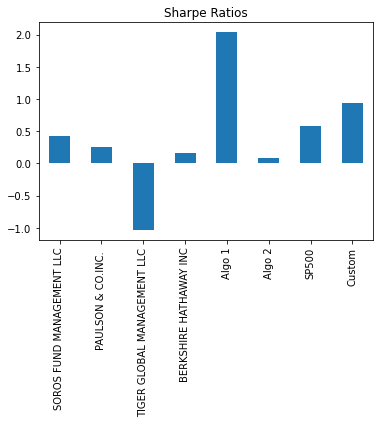

In [45]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharperatios_final.plot(kind='bar',title='Sharpe Ratios')

### Based on sharpe ratios, how does custom fare?
* Custom outperforms the market (sp500), algo 2, berkshire hathaway, tiger global managmenet, paulson & co inc and soros fun managmenet on the basis of sharpe returns. The only portfolo it does not outperform is Algo 1

In [46]:
# Create a correlation analysis
# YOUR CODE HERE

corrdf_final = finalportfolio.corr()
corrdf_final.style.background_gradient(cmap='winter')

### Which portfolios are most correlated with Custom?
* MOST: SP500, Berkshire & ALgo 2
* LEAST: ALgo 1, Tiger, & Paulson

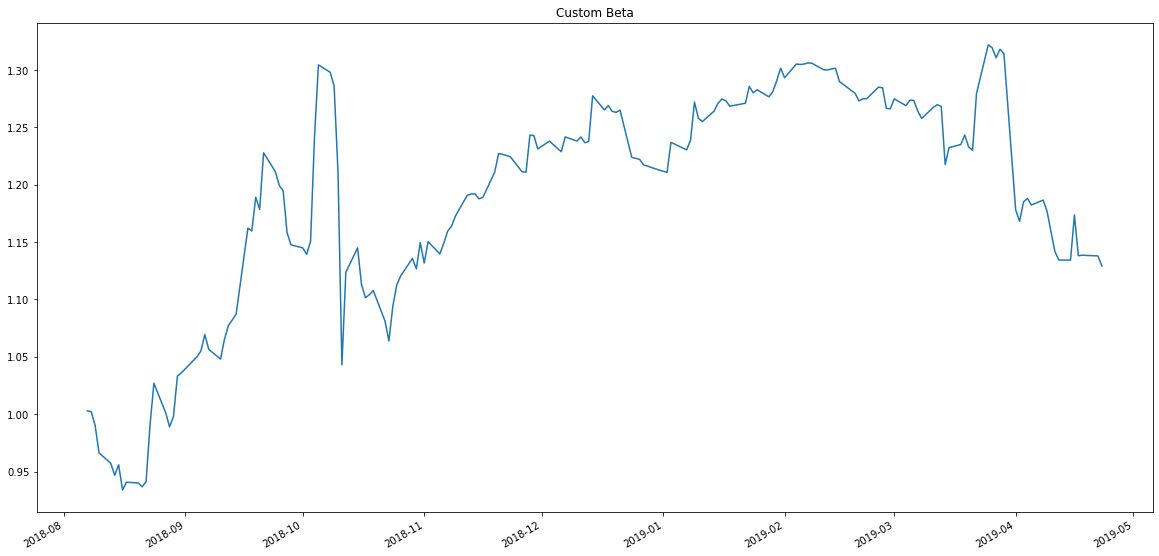

In [47]:
# Beta
# YOUR CODE HERE

covar_final = finalportfolio['Custom'].rolling(window=60).cov(finalportfolio['SP500'])
variance = finalportfolio['SP500'].rolling(window=60).var()
beta_custom = covar_final / variance

beta_custom.plot(figsize=(20,10),title="Custom Beta")

* except for a short period in august of 2018, our Custom portfolio experienced higher returns than a market, maintaining a beta of greater than 1 for sep 2018 through may 2019